# 공공보건의료기관 현황 분석
## 공공보건의료기관 현황 데이터 준비

In [41]:
import pandas as pd
import numpy as np

data=pd.read_csv('공공보건의료기관현황.csv', index_col=0, encoding='euc_kr')
print(data.columns)
data.head()

Index(['병원 명', '설립형태', '근거 법령', '관계 행정기관', '관계 공공단체', '심평원 요양기관번호', '종별구분',
       '병상수', '소재지 우편번호', '주소', '홈페이지', '대표전화', 'FAX', '비고'],
      dtype='object')


,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [42]:
addr=pd.DataFrame(data['주소'])
addr

,주소
연번,
1,강원도 춘천시 충열로 142번길 24-16
2,강원도 삼척시 오십천로 418
3,강원도 영월군 영월읍 중앙1로 59
4,강원도 원주시 서원대로 387(개운동)
5,강원도 강릉시 경강로 2007(남문동 164-1)
...,...
216,충청북도 제천시 금성면 청풍호로 1147
217,충청북도 충주시 동량면 대전리 1686-28
218,충청북도 충주시 안림로 239-50(안림동 134)


In [43]:
addr=addr['주소'].apply(lambda v:v.split()[:2])
addr

연번
1       [강원도, 춘천시]
2       [강원도, 삼척시]
3       [강원도, 영월군]
4       [강원도, 원주시]
5       [강원도, 강릉시]
          ...     
216    [충청북도, 제천시]
217    [충청북도, 충주시]
218    [충청북도, 충주시]
219    [충청북도, 영동군]
220    [충청북도, 단양군]
Name: 주소, Length: 227, dtype: object

In [44]:
addr=pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [45]:
print(addr['시도'].unique())
# 창원시, 경산시, 천안시 등은 잘못 들어가 있는 데이터

['강원도' '경기도' '경기' '경남' '창원시' '경상남도' '경상북도' '경산시' '경북' '인천광역시' '대구광역시'
 '전라남도' '대전광역시' '광주광역시' '제주특별자치도' '부산광역시' '전라북도' '충북' '서울특별시' '서울시'
 '부산특별시' '대전시' '충남' '전남' '충청남도' '울산광역시' '전북' '천안시' '충청북도']


In [46]:
# 시도가 창원시인 행 출력
addr[addr['시도']=='창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [47]:
# 시도가 창원시인 행들의 값 변경
addr.iloc[27]=['경상남도', '창원시']
addr.iloc[31]=['경상남도', '창원시']

In [48]:
# 값이 제대로 바뀌었는지 확인
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [49]:
# 동일하게 경산시, 천안시 주소 데이터 변경
addr[addr['시도']=='경산시']

,시도,군구
47,경산시,경안로


In [50]:
addr.iloc[47]=['경상북도', '경산시']
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [51]:
addr[addr['시도']=='천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [52]:
addr.iloc[209]=['충청남도', '천안시']
addr.iloc[210]=['충청남도', '천안시']

In [53]:
addr.iloc[209]

시도    충청남도
군구     천안시
Name: 209, dtype: object

In [54]:
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [55]:
addr_aliases={'경기':'경기도', '경남':'경상남도','경북':'경상북도',
             '충북':'충청북도','서울시':'서울특별시','부산특별시':'부산광역시',
             '대전시':'대전광역시','충남':'충청남도','전남':'전라남도','전북':'전라북도'}

In [56]:
addr['시도']=addr['시도'].apply(lambda v: addr_aliases.get(v, v))

In [57]:
print(addr['시도'].unique())

['강원도' '경기도' '경상남도' '경상북도' '인천광역시' '대구광역시' '전라남도' '대전광역시' '광주광역시'
 '제주특별자치도' '부산광역시' '전라북도' '충청북도' '서울특별시' '충청남도' '울산광역시']


In [58]:
# 군구 이름 확인
print(addr['군구'].unique())

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '아란13길' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '제주시' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군'
 '단양군']


In [59]:
# 아란13길 데이터 변경
addr[addr['군구']=='아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [60]:
addr.iloc[75]=['제주특별자치도','제주시']
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [61]:
print(addr['군구'].unique())

['춘천시' '삼척시' '영월군' '원주시' '강릉시' '속초시' '정선군' '수원시' '이천시' '안성시' '의정부시' '포천시'
 '파주시' '용인시' '평택시' '시흥시' '여주시' '남양주시' '동두천시' '안산시' '부천시' '통영시' '사천시' '창원시'
 '김해시' '양산시' '거창군' '남해군' '의령군' '포항시' '김천시' '안동시' '울진군' '경주시' '구미시' '영주시'
 '상주시' '문경시' '경산시' '의성군' '청도군' '고령군' '칠곡군' '봉화군' '울릉군' '부평구' '북구' '순천시'
 '대덕구' '태백시' '동해시' '화성시' '광산구' '남구' '중구' '제주시' '서구' '전주시' '진주시' '청주시'
 '종로구' '성남시' '동구' '화순군' '강동구' '사상구' '달서구' '해운대구' '유성구' '가평군' '양주시' '고양시'
 '홍천군' '양구군' '청원군' '계룡시' '논산시' '함평군' '양평군' '수성구' '달성군' '연수구' '노원구' '기장군'
 '공주시' '강북구' '광진구' '나주시' '창녕군' '목포시' '고흥군' '연제구' '동매로' '서초구' '은평구' '중랑구'
 '강남구' '동작구' '동대문구' '양천구' '성동구' '송파구' '울주군' '계양구' '옹진군' '보성군' '광양시' '영광군'
 '무안군' '진도군' '강진군' '곡성군' '여수시' '신안군' '장성군' '완주군' '부안군' '정읍시' '남원시' '군산시'
 '고창군' '진안군' '서귀포시' '천안시' '보령시' '서산시' '서천군' '홍성군' '제천시' '충주시' '영동군' '단양군']


In [62]:
# '시도'와 '군구'를 합친 새로운 컬럼 추가
addr['시도군구']=addr.apply(lambda r:r['시도']+' '+r['군구'], axis=1)
addr.head()

,시도,군구,시도군구
0,강원도,춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군
3,강원도,원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시


In [63]:
# count 컬럼 추가
addr['count']=0
addr.head()

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,0


In [64]:
# 행정구역별 공공보건의료기관의 수 구하기
addr_group=pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index=False).count())
addr_group

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1
...,...,...,...,...
135,충청북도,영동군,충청북도 영동군,1
136,충청북도,제천시,충청북도 제천시,1
137,충청북도,청원군,충청북도 청원군,1
138,충청북도,청주시,충청북도 청주시,4


In [65]:
# ['시도군구'] 컬럼을 데이터프레임 병합에사용할 인덱스로 설정
addr_group=addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


## 행정구역별 인구 데이터 준비

In [66]:
population=pd.read_excel('행정구역시군구별_성별인구수.xlsx')
population.head()

,행정구역(시군구)별(1),행정구역(시군구)별(2),총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


In [67]:
population=population.rename(columns={'행정구역(시군구)별(1)':'시도',
                                     '행정구역(시군구)별(2)':'군구'})
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51847509,25862863,25984646
1,서울특별시,소계,9733509,4745088,4988421
2,서울특별시,종로구,151215,73688,77527
3,서울특별시,중구,126201,61946,64255
4,서울특별시,용산구,229385,110701,118684


#### 행정구역별 데이터에서 병합에 사용할 공통 컬럼 추가

In [68]:
# ['군구'] 컬럼에서 공백 제거
row_count=population.shape[0]
for element in range(0, row_count):
    population['군구'][element]=population['군구'][element].strip()

C:\Users\User\AppData\Local\Temp\ipykernel_6312\1521735120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['군구'][element]=population['군구'][element].strip()


In [69]:
# ['시도']와 ['군구'] 연결하여 ['시도군구'] 컬럼 추가
population['시도군구']=population.apply(lambda r:r['시도']+' '+r['군구'], axis=1)

In [70]:
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51847509,25862863,25984646,전국 소계
1,서울특별시,소계,9733509,4745088,4988421,서울특별시 소계
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구


In [71]:
# ['군구'] 컬럼에서 '소계' 항목 제거
population=population[population['군구']!='소계']
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
2,서울특별시,종로구,151215,73688,77527,서울특별시 종로구
3,서울특별시,중구,126201,61946,64255,서울특별시 중구
4,서울특별시,용산구,229385,110701,118684,서울특별시 용산구
5,서울특별시,성동구,300410,147020,153390,서울특별시 성동구
6,서울특별시,광진구,351263,170164,181099,서울특별시 광진구


In [72]:
# ['시도군구'] 컬럼을 병합에 사용할 인덱스로 설정
population=population.set_index('시도군구')
population.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,151215,73688,77527
서울특별시 중구,서울특별시,중구,126201,61946,64255
서울특별시 용산구,서울특별시,용산구,229385,110701,118684
서울특별시 성동구,서울특별시,성동구,300410,147020,153390
서울특별시 광진구,서울특별시,광진구,351263,170164,181099


In [73]:
# 의료기관 데이터프레임(addr_group)과 행정구역별 인구 수 데이터프레임(population) 병합
addr_population_merge=pd.merge(addr_group, population, how='inner',
                              left_index=True, right_index=True)
addr_population_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,213328,105775,107553
강원도 동해시,강원도,동해시,1,강원도,동해시,90417,45782,44635
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,66806,33811,32995
강원도 속초시,강원도,속초시,1,강원도,속초시,81840,40470,41370
강원도 양구군,강원도,양구군,1,강원도,양구군,22526,11937,10589


In [74]:
# 필요한 컬럼만 추출해서 새로운 데이터프레임 생성
local_medicalcener_population=addr_population_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_medicalcener_population=local_medicalcener_population.rename(columns=
                                                                  {'시도_x':'시도', '군구_x':'군구',
                                                                  'count':'공공의료기관수', '총인구수 (명)':'인구수'})
local_medicalcener_population.head()

,시도,군구,공공의료기관수,인구수
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,213328
강원도 동해시,강원도,동해시,1,90417
강원도 삼척시,강원도,삼척시,1,66806
강원도 속초시,강원도,속초시,1,81840
강원도 양구군,강원도,양구군,1,22526


In [76]:
# 인구대비 공공의료기관 비율 계산 및 컬럼 추가
mc_count=local_medicalcener_population['공공의료기관수']
local_population=local_medicalcener_population['인구수']

local_medicalcener_population['인구대비의료기관비율']=mc_count.div(local_population, axis=0)*100000
local_medicalcener_population.head()

,시도,군구,공공의료기관수,인구수,인구대비의료기관비율
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,213328,1.875047
강원도 동해시,강원도,동해시,1,90417,1.105987
강원도 삼척시,강원도,삼척시,1,66806,1.496872
강원도 속초시,강원도,속초시,1,81840,1.221896
강원도 양구군,강원도,양구군,1,22526,4.439315


<AxesSubplot:xlabel='시도군구'>

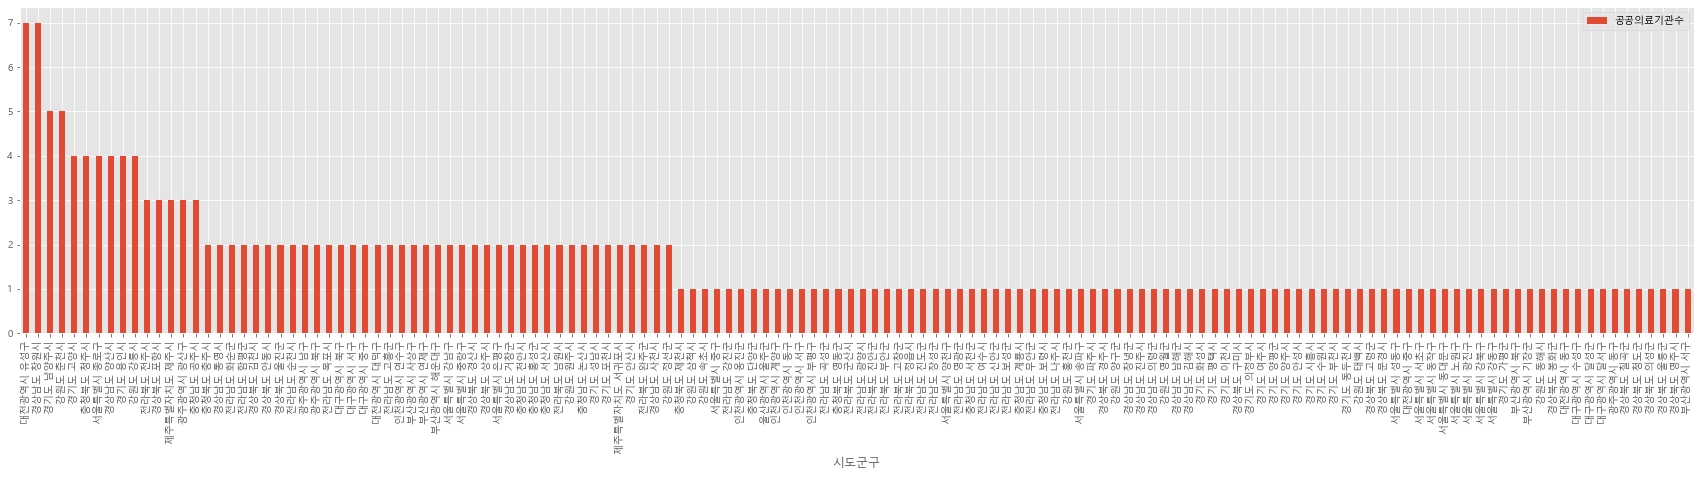

In [80]:
# 지역별 공공의료기관수 현황
import matplotlib.pyplot as plt
import platform

plt.style.use('ggplot')
if platform.system()=='Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
mc_ratio=local_medicalcener_population[['공공의료기관수']]
mc_ratio=mc_ratio.sort_values('공공의료기관수', ascending=False)
mc_ratio.plot(kind='bar', rot=90, figsize=(30, 6))

<AxesSubplot:xlabel='시도군구'>

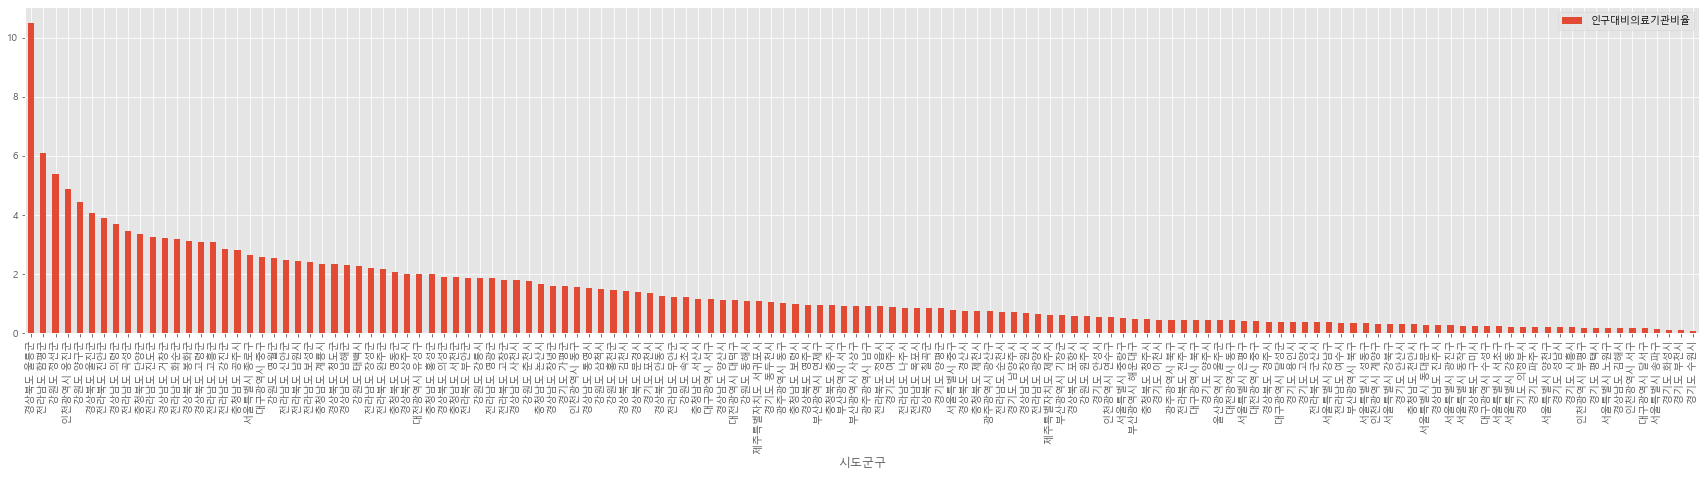

In [81]:
# 인구대비 공공의료기관 비율
import matplotlib.pyplot as plt
import platform

plt.style.use('ggplot')
if platform.system()=='Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
population_mc_rate=local_medicalcener_population[['인구대비의료기관비율']]
population_mc_rate=population_mc_rate.sort_values('인구대비의료기관비율', ascending=False)

population_mc_rate.plot(kind='bar', rot=90, figsize=(30, 6))